## Linear Models for Regression & Classification

<hr>

### Agenda
1. Simple Linear Regression using Ordinary Least Squares
2. Gradient Descent Algorithm
3. Regularized Regression Methods - Ridge, Lasso, ElasticNet
4. Logistic Regression for Classification
5. OnLine Learning Methods - Stochastic Gradient Descent & Passive Aggrasive
6. Robust Regression - Dealing with outliers & Model errors
7. Polynomial Regression
8. Bias-Variance Tradeoff

* Link https://www.slideshare.net/zekelabs/linear-regression-114293440

<hr>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Simple Linear Regression using Ordinary Least Squares

* Feature consist of p independent variables (p-dim)
* Target/dependent variable is represented by y
* Relation between feature & target is represented by the following equation
* w's represent weights or coef's for each feature, w0 is intercept 

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

In [6]:
from sklearn.linear_model import LinearRegression

* Residual Squared Sum (RSS) of Error - Sum of square of difference between actual value & predicted value

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

## 2. Gradient Descent

* LinearRegression tries to minimize RSS using <a href="https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html">Gradient Descent</a>. 
* The objective of Gradient Descent is the obtain best weights such that RSS is minimal.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/gd.PNG?raw=true" width="500">

# Feature Transformation
![](img/1.featureTransform-01.jpg)

### Understanding Math behind gradient descent with simplified notation
* Prediction, $y_p = Ax+B$
* Actual, y
* Simplified Loss for caclulation, Loss = $1/2 *\sum(y_p - y)^2$
* Algorithm 
  - Randomly initialize weights A & B
  - Calculate gradient .i.e change in Loss when A & B are changed.
  - Change weights by gradients calculated & reduce the loss
  - Repeat the whole process till weights don't significantly reduce any further
  
![](img/2.gradientDescent-01.jpg)

<img src="image.png" width="500">
<h3> differentiating wtr b </h3>
<img src="im2.png" width="500">
<img src="im3.png" width="500">

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Genrating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [8]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

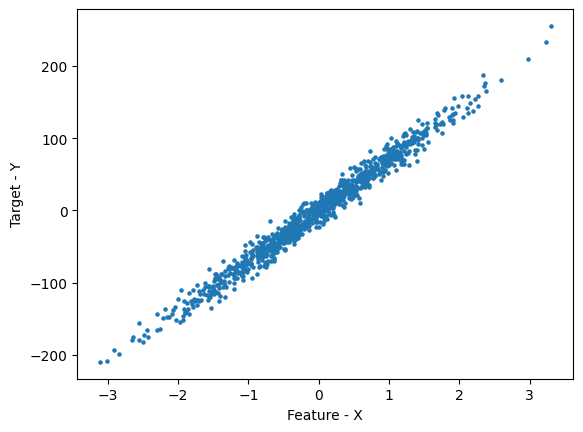

In [9]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

* Hyper-parameters are initial configuration of Models
* Initialize LinearRegression model with default hyper-parameters

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

#### Common Hyperparameters
* fit_interceprt - Whether to calculate intercept for the model, not required if data is centered
* normalize - X will be normalized by subtracting mean & dividing by standard deviation

* <b>PS: By stanrdadizing data before subjecting to model, coef's tells the importance of features</b>

#### Common Attributes
* coef - weights for each independent variables
* intercept - bias of independent term of linear models

#### Common Functions
* fit - trains the model. Takes X & Y
* predict - Once model is trained, for given X using predict function Y can be predicted

#### Multiple Target
* Y can be of more than 1 dimension
* Advantages of multiple target are 
  - computationally fast
  - model is optimized for multiple targets
  - model do not use relationship between targets
  - model is more interpretable
  
<hr/>

### Training model
* X should be in rows of data format, X.ndim == 2
* Y should be 1D for simgle target & 2D for more than one target
* fit function for training the model

In [12]:
lr.fit(X,Y)

LinearRegression()

In [13]:
lr.coef_
#* slope y=Ax+b here its A

array([70.77843808])

In [14]:
lr.intercept_
#* here is intercept 

0.18360671270944273

### Predicting using trained model

In [15]:
pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

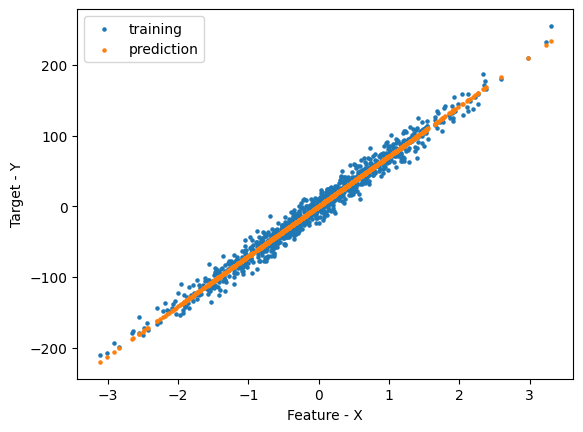

In [16]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#### Limitation of Ordinary Least Square Technique
* Impacted by Outliers
* Non-linearities 
* Too many independent variables
* Multicollinearity 
* Heteroskedasticity
* Noise in the Independent Variables
* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

## 3. Regularized Regression Methods 
![](img/3.RegressionTechniques-01.jpg)

### Ridge Regression
* Ridge Regression imposes penalty on size of coef.
* Less impacted by outliers.

#### Adding outliers to data

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression()

In [19]:
ridge.coef_

array([0.44186047, 0.44186047])

In [20]:
lr.coef_

array([0.475, 0.475])

In [21]:
outliers = Y[950:] - 600
#* the datas which are different from rest are called outliers


In [22]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

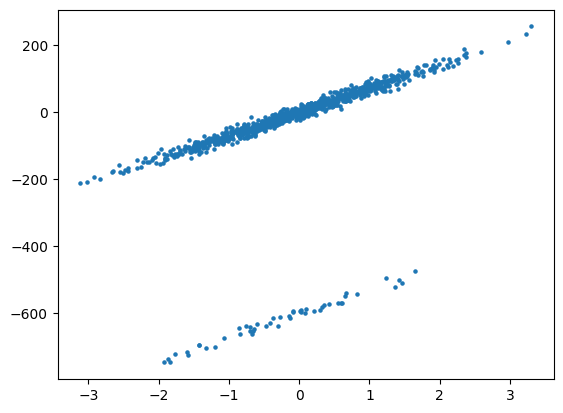

In [23]:
plt.scatter(X,Y_Out,s=5)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X,Y_Out)

LinearRegression()

In [26]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

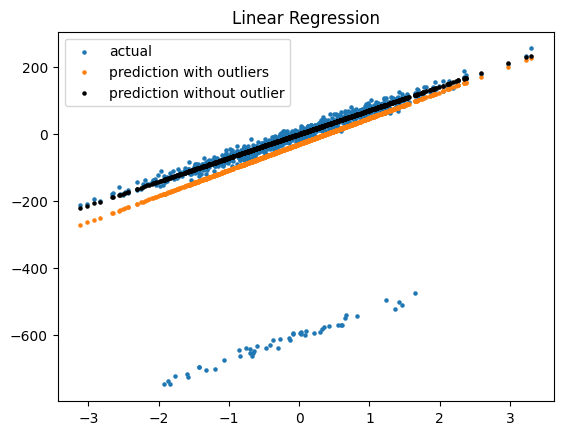

In [27]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [28]:
lr.coef_

array([77.37998442])

In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge = Ridge(alpha=1000)

In [31]:
ridge.fit(X,Y_Out)

Ridge(alpha=1000)

In [32]:
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

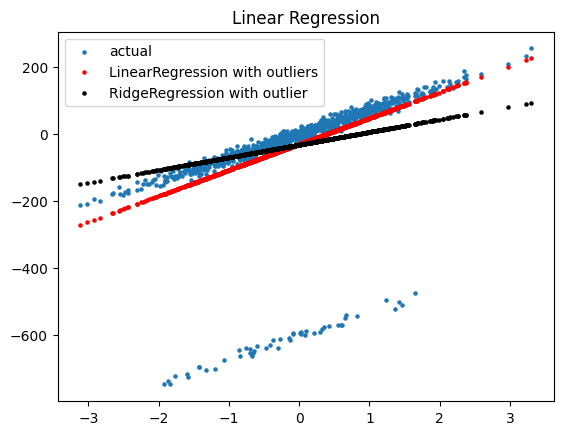

In [33]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [34]:
ridge.coef_

array([37.78125787])

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [35]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [36]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [37]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [38]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
* Different colors represents different coefs

#### Conclusion
* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

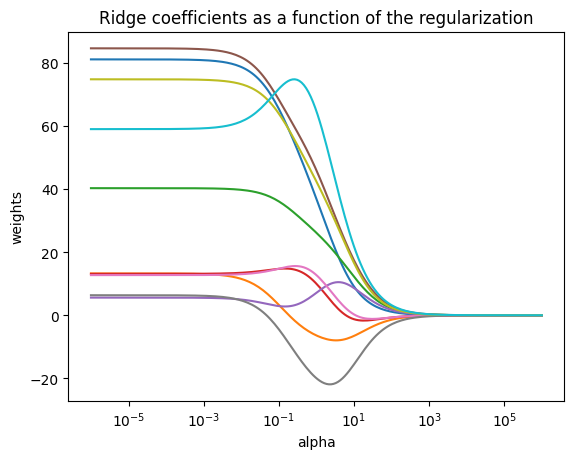

In [39]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Lasso
* Linear model that predict's sparse coefs
* Reduces the regressors predicting target

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1)

In [42]:
lasso.coef_

array([0.5, 0. ])

### Elastic Net   

* Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
en = ElasticNet(alpha=.1)

In [45]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1)

In [46]:
en.coef_

array([0.32589556, 0.32579954])

## 4. Logistic Regression
* Linear Model of classification, assumes linear relationship between feature & target
* y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
* Returns class probabilities
* Hyperparameter : C - regularization coef
* Fundamentally suited for bi-class classification

![](img/4.LogisticRegression-01.jpg)

In [47]:
from sklearn.datasets import make_blobs

In [48]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2)

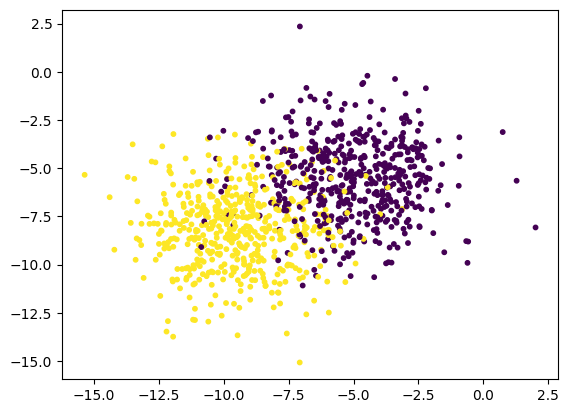

In [49]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
#* x[:,0] for first cluster
#* x[:,1] for 2nd cluster

In [50]:
# Define the step size for the meshgrid
h = 0.02

# Calculate the boundaries for the x and y axes for plotting
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Generate the meshgrid of points based on the specified step size
# This will be used for creating the decision boundary plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [52]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

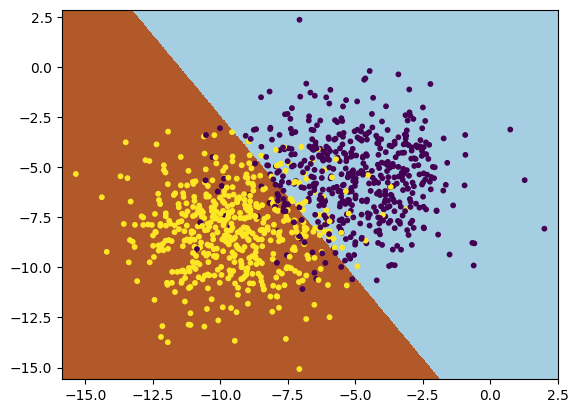

In [53]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

## 5. Online Learning Models
* Stochastic Gradient Descent & Passive Aggrasive Algorithms
* Simple & Efficient to fit linear models
* Useful where number of samples is very large ( Scale of 10^5 ) 
* Supports partial_fit for out-of-core learning
* Both the algorithms support regression & classification

In [54]:
from sklearn.datasets import make_classification, make_regression

In [55]:
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
trainX,testX, trainY,testY = train_test_split(X,y)

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
sgd = SGDClassifier(n_iter=10)

TypeError: SGDClassifier.__init__() got an unexpected keyword argument 'n_iter'

In [ ]:
sgd.partial_fit(trainX[:1500],trainY[:1500], classes=[0,1])
sgd.score(testX,testY)

0.7904

In [ ]:
sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
sgd.score(testX,testY)

0.8116

### 6. Robust Regression
* Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
* Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

#### Comparisions RANSAC, Theil Sen, HuberRegressor
* HuberRegressor should be faster than RANSAC 
* Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
* RANSAC will deal better with large outliers in the y direction
* RANSAC is faster than Theil Sen and scales much better with the number of samples
* RANSAC is a good default option

In [61]:
n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [62]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [63]:
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

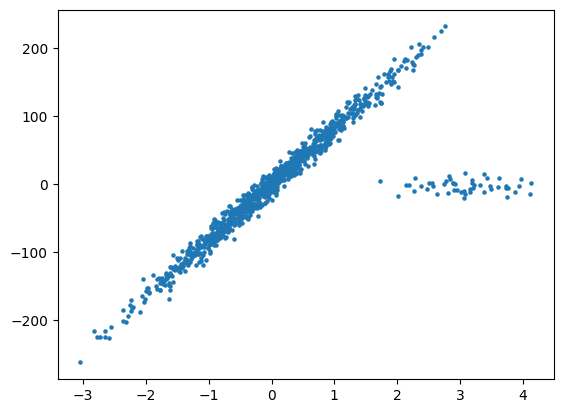

In [64]:
plt.scatter(X,y,s=5)

In [68]:
ransac_pred = ransac.predict(X)

In [69]:
lr_pred = lr.predict(X)

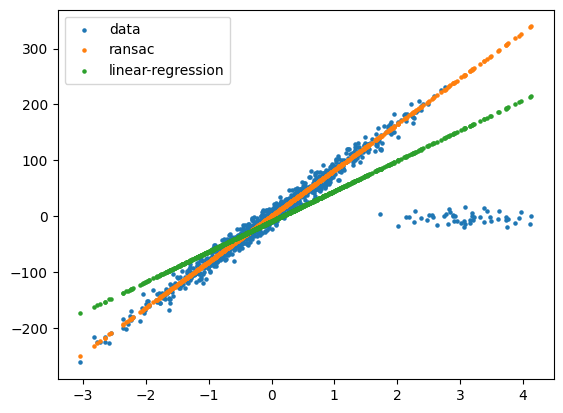

In [70]:
plt.scatter(X,y,s=5, label='data')
plt.scatter(X,ransac_pred,s=5,label='ransac')
plt.scatter(X,lr_pred,s=5, label='linear-regression')
plt.legend()

## 7. Polynomial Regression
* Sometimes relationship between variables & target is of higher polynomial degree
* Transformer can be used to convert data to higher degree
* Linear models can predict coef of these higher degree polynomials

In [71]:
from sklearn.datasets import make_circles

In [72]:
X,y = make_circles(n_samples=1000, noise=.04)

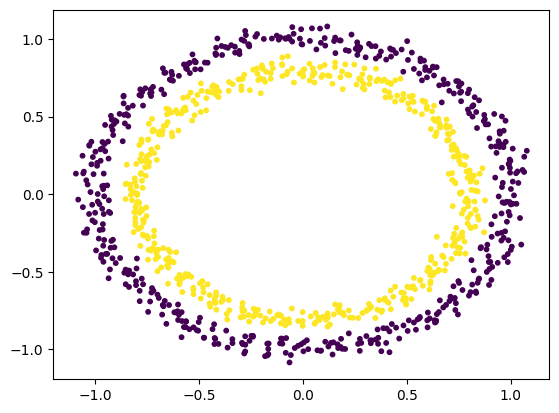

In [73]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pol = PolynomialFeatures(degree=2)

In [76]:
X_tf = pol.fit_transform(X)

In [77]:
lr = LogisticRegression()

In [78]:
trainX,testX,trainY,testY = train_test_split(X_tf,y)

In [79]:
lr.fit(trainX,trainY)

LogisticRegression()

In [80]:
lr.score(testX,testY)

0.996

In [81]:
lr.coef_

array([[-1.13886114e-04, -4.92207798e-02,  4.62984031e-02,
        -9.48481162e+00, -1.29156437e-01, -9.35699000e+00]])

### 8. Bias Variance 
<img src="https://github.com/awantik/machine-learning-slides/blob/master/bv.PNG?raw=true">
#### Bias

* Fitting training data poorly, but produce similar result outside training data
* we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
* Situation of underfitting.
*  a linear regression model would have high bias when trying to model a non-linear relationship.

#### Variance
* Building complex model that fits the training data well but many not work similar way of other dataset.
* Model is not generalized & is overfitting.

#### Bias Variance TradeOff
* Increasing the accuracy of the model will lead to less generalization of pattern outside training data. 
* Increasing the bias will decrease the variance. 
* Increasing the variance will decrease the bias.
* We have to get perfect balance of bias & variance

![](img/questions-01.png)

# 1. Linear Regression

### 1.1 Conceptual Questions
1. What is the difference between target and prediction? $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star$)
2. What is the loss used in standard Linear Regression Problem?  $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$ ($\star$)
3. What is objective function in Linear regression? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star \star \star$)
4. What are parameters being optimized in Linear Regression? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star$)
5. What is the feature vector in Linear Regression $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$  ($\star$)
6. What are linear models? Are they only about lines? $\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot$ ($\star$)
### 1.2 Programming Questions
1. Write a code to  $\hspace{2 cm}\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star \star \star$)  
  a. generate a 1000 points following $y=2x+3 + 0.1*U(0,1)$ where **'N'** is uniform noise between 0 and 1 and x is lying between -1 and 1.  
  b. split the data into 8:2 ratio  
  c. Fit the Linear Regression model over 80% training data and find train loss and validation loss.  
  d. Plot the prediction and actual label for the given data in the same plot.
  e. Plot the predicted line and actual line in a same plot.  
  f. Use subplot to display **d.** and **e.** sidebyside.  
  g. How do you explain extra 0.05 in the bias coeffecient?  

# 2. Gradient Descent
### 2.1. Conceptual Questions
1. What is the gradient of a multivariate function $f(x,y)$? $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star$)  
2. Find the partial derivate of the bellow functions with respect to x and y $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star$)  
  $ \begin{align}
 a)\hspace{5pt}x^5 &&
 b)\hspace{5pt}(2x+y^2)^2  &&
 c)\hspace{5pt}ylog(x) &&
 d)\hspace{5pt}(y-\frac{1}{1+e^{-x}})^2
  \end{align}$  
  
3. Find the gradient of the bellow functions with respect to $ \vec{x}=[x_1,x_2]$ for $x=(0,0), (1,1)\text{ and }(0,1)$.   
***Note : $\vec{w}=[2,3]$ for the problem ***  
  
  $ \begin{align}
 a)\hspace{5pt} w^\top x &&
 b)\hspace{5pt}log(1+w^\top x)  &&
 c)\hspace{5pt} \frac{1}{1+e^{-w^\top x}} &&
  \end{align}$
  
4.  What is learning rate, step size and momentum in gradient descent. What do they signify in theory and in practice? $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star \star \star$)  
5. What is difference between stochastic gradient descent, batch descent and the standard gradient descent. $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star$)  
6. What is a Jacobian Matrix and Hessian Matrix?  $
\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star $)  
7. Write the pseudo code for gradient descent for Linear Regression.

# 3. Polynomial Regression Introduction
### 3.1 Conceptual Questions
1. Is Polynomial regression special case of linear regression? If yes, what is the feature transformation used?  
2. What does each of the coeffecient in polynomial regression represent? Slope, Slope of slope, etc.  
3. What is the order and degree of polynomial?   

# 4. LASSO AND Ridge Regression
### 4.1 Conceptual Question
1. Find the Lp Norm with p = $\frac{1}{2},1,2$ for the bellow vectors  $ \hspace{2 cm}\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star $) 
  $ \begin{align}
 a)\hspace{5pt} [1,2,3] &&
 b)\hspace{5pt} [3,4]  &&
 c)\hspace{5pt} [4,3] &&
 d)\hspace{5pt} [6,8,10,30,100] &&
 e)\hspace{5pt} [1,10,100]
  \end{align}$  

2. When do we choose Manhattan distance instead of euclidean. List atleast 3 reasons.  
3. Why do we regularize weights? What is its impact on objective function?  
4. What is a sparse solution? Why do we desire it?  
5. What is the impact of strong regularization? How to choose a regularization constant?  
6. Why does L1 regularization of weights give a sparse solution ?  
7. How to theoratically find if the regularization is dominant or is it the rms loss function?

### 4.2 Programming Questions
1.  Write a code to  $ \hspace{2 cm}\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star \star \star$)  
  a. generate a 1000 points following $y=2x^2+5 + N(0,1)$ where **'N'** is standard normal gaussian noise with 0 mean, 1 standard deviation and where x is between -2 and 2.  
  b.  Fit the linear equation, quadratic equation and polynomial of order 5.  
  c.  Find out the number of iteration it takes to get a solution within $\pm 0.01$ error margin for all the three cases.  
  d.  Try to use L1 Regularization and find out the feature indices which had 0 weight coefficient associated with it in the solution. i.e in $ax^4+bx^3+cx^2+dx+e$, if a,e are 0, then $x^4$,constant are the redundant features.
  e.  Select only 25 points out of 1000 points and fit the models mentioned in **'b.'** again.  
  f. Use L2 regularization and observe if it gives a better solution after 200 iterations than its counterpart unregularized versions.

# 5 Robust Regression
### 5.1 Conceptual Questions
1. Write the pseudo-code for RANSAC.  
2. How is RANSAC different from Theil Sen? Which one gives faster convergence?  

### 5.2 Programming Questions
1. Write a code to  $ \hspace{2 cm}\cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot \cdot $ ($\star \star \star \star \star$)  
  a. Generate a 1000 points following $y=2x+3 + 0.1*U(0,1)$ where **'N'** is uniform noise between 0 and 1 and x is lying between -1.   
  b. Add 50 more points with equation   $y=2x+200 + 0.1*U(0,1)$ with x lying between -1 and 1. This results in a total of 1050 points.   
  c. Compare the performance of Linear Regression and RANSAC for the same.  
  d. Plot the points considered as inliers by the RANSAC with color1 and the outliers with color2.  
  e. Plot the left and right margin for RANSAC line fit along with the points.  

# 5 Logistic Regression
### 5.1 Conceptual Questions
1. What is the decision boundary in Logistic Regression? What is the order of the equation to represent decision boundary for a feature vector of dimension n?  
2. How is classification different from regression. What are the different ways to convert binary classifier into a multiclass classifier?  
3. Why did we use sigmoid curve instead of heaviside/step function?  
4. What is entropy of a probability distribution?  
5. Write down the binary cross entropy loss for logistic regression.  
6. Why do we use cross entropy loss instead of root mean square loss?  
7. What is catagorical cross entropy loss? How is it different from binary cross entropy loss?  
8. What is difference between self entropy and cross entropy. Which one are we using for loss?  
9. Why is the output of logistic regression called logit?  
10. What is the target/label/actual output  and behavior/logit/predicted output ?  
11. What is it that we are trying to learn ? Why do we call classification/regression as a function approximation problem?  

### 5.2 Programming Questions
1. Write the code for the following.  
  a. Generate a set of 1000 points in 2D with centers as (-2,0) and (2,0) and standard deviation as 0.5.  
  b. Shuffle the data and select 80% of data for training and 20% for validation  
  c. Plot the training data  
  d. Find the accuracy for Training and Validation  
  e. Do the steps from a. to d. with 3 centers instead of two.i.e. (-2,0),(-6,0) and (0,2). Here points via center (-6,0) and (0,2) belong to the same class. Check the performance of the Logistic Regression. Explain the change in accuracy for validation data.  


